# Exploring Solar Plant Generation Data


## **1.** About the Dataset
This project uses a solar plant generation dataset [available on Kaggle](https://www.kaggle.com/anikannal/solar-power-generation-data).


## **2.** Imports & Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_rows', 200)

---

## **3.** Load Data

In [2]:
# load generation data from plant #2
gen_path = '../data/Plant_2_Generation_Data.csv'
gen_df = pd.read_csv(gen_path)

In [3]:
# load weather data from plant #2
weather_path = '../data/Plant_2_Weather_Sensor_Data.csv'
weather_df = pd.read_csv(weather_path)

---

## **4.** Detail & Clean


### **4.1.** Detail Generation DataFrame
First, let's review a few characteristics of our dataset.

In [4]:
gen_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [6]:
gen_df['PLANT_ID'].value_counts()

4136001    67698
Name: PLANT_ID, dtype: int64

### **4.2.** Detail Weather DataFrame


In [7]:
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [9]:
# double-check that all data comes from same plant
weather_df['PLANT_ID'].value_counts()

4136001    3259
Name: PLANT_ID, dtype: int64

### 4.3. Merge Dataframes
We will merge the DataFrames on both the 'PLANT_ID' and 'DATE_TIME' columns.

First, let's convert the 'DATE_TIME' columns to compatible DateTime formats. 

In [10]:
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'], 
                                     format='%Y-%m-%d %H:%M:%S')


# pd.to_datetime seems to have a quirk df.head() will not display the full 
# DATE_TIME if end values are 0, unless it has other non-0 values to display

gen_df.head(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
5,2020-05-15 00:00:00,4136001,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09
6,2020-05-15 00:00:00,4136001,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08
7,2020-05-15 00:00:00,4136001,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06
8,2020-05-15 00:00:00,4136001,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08
9,2020-05-15 00:00:00,4136001,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09


In [11]:
 weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], 
                                         format='%Y-%m-%d %H:%M:%S')
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


Now that the columns we'll merge on are in the same format, we can perform the merge.

In [12]:
df = pd.merge(gen_df, weather_df,  how='left', on = ['DATE_TIME', 'PLANT_ID'])
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


### 4.4. DateTime Breakout
We may want to more easily select particular days or times, so we'll break those values out of our 'DATE_TIME' column.

In [13]:
df['DAY'] = df['DATE_TIME'].dt.strftime('%Y-%m-%d')
df['TIME'] = df['DATE_TIME'].dt.strftime('%H:%M')
df['MONTH'] = df['DATE_TIME'].dt.month
df['HOUR'] = df['DATE_TIME'].dt.hour

df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,MONTH,HOUR
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00,5,0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00,5,0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00,5,0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00,5,0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15,00:00,5,0


---

## **5.** Explore

### 5.1. Plant-Level Insights

In [14]:
df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,MONTH,HOUR
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204,5.529705,11.530208
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365,0.499120,6.922127
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000,5.000000,0.000000
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000,5.000000,6.000000
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554,6.000000,12.000000
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027,6.000000,18.000000
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766,6.000000,23.000000


In [15]:
# Inverter/Generator Names
df['SOURCE_KEY_x'].unique()

array(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR',
       'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb',
       'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u',
       'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX',
       'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp',
       'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt',
       'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB',
       'xoJJ8DcxJEcupym'], dtype=object)

In [16]:
# Date Range
display(df['DATE_TIME'].min())
display(df['DATE_TIME'].max())

Timestamp('2020-05-15 00:00:00')

Timestamp('2020-06-17 23:45:00')

While we have no NULL values, we are missing values for various times throughout the day. We'll note this as to be careful in our visualizations. 

In [17]:
df['TIME'].value_counts().sort_index()

00:00    702
00:15    702
00:30    702
00:45    702
01:00    702
01:15    702
01:30    702
01:45    702
02:00    702
02:15    702
02:30    702
02:45    702
03:00    702
03:15    702
03:30    702
03:45    702
04:00    702
04:15    702
04:30    702
04:45    702
05:00    702
05:15    702
05:30    702
05:45    702
06:00    702
06:15    702
06:30    702
06:45    702
07:00    702
07:15    702
07:30    702
07:45    702
08:00    702
08:15    702
08:30    702
08:45    702
09:00    702
09:15    702
09:30    702
09:45    702
10:00    702
10:15    702
10:30    702
10:45    702
11:00    702
11:15    702
11:30    702
11:45    702
12:00    702
12:15    702
12:30    702
12:45    702
13:00    702
13:15    702
13:30    702
13:45    702
14:00    680
14:15    712
14:30    712
14:45    712
15:00    712
15:15    712
15:30    712
15:45    712
16:00    672
16:15    716
16:30    716
16:45    716
17:00    716
17:15    716
17:30    716
17:45    694
18:00    716
18:15    716
18:30    716
18:45    716
19:00    716

At plant 2, we notice much more efficient inverters than at plant one. However, the numbers are slightly suspicious. While plant 1 has an average inverter efficiency of 9.77%, plant 2 shows an efficiency of nearly 97.7%. Perhaps the sensors at one of these plants are not working properly?
<br />
<br />
We also notice a much lower mean production, with DC power at Plant 2 peaking at about 20,000kW per day, while Plant 1 approached 300,000 kW.
<br />
<br />
That is not to say these plants are comparable. One Plant 1 may be much larger than Plant 2. However, the inverter efficiency is still suspicious.

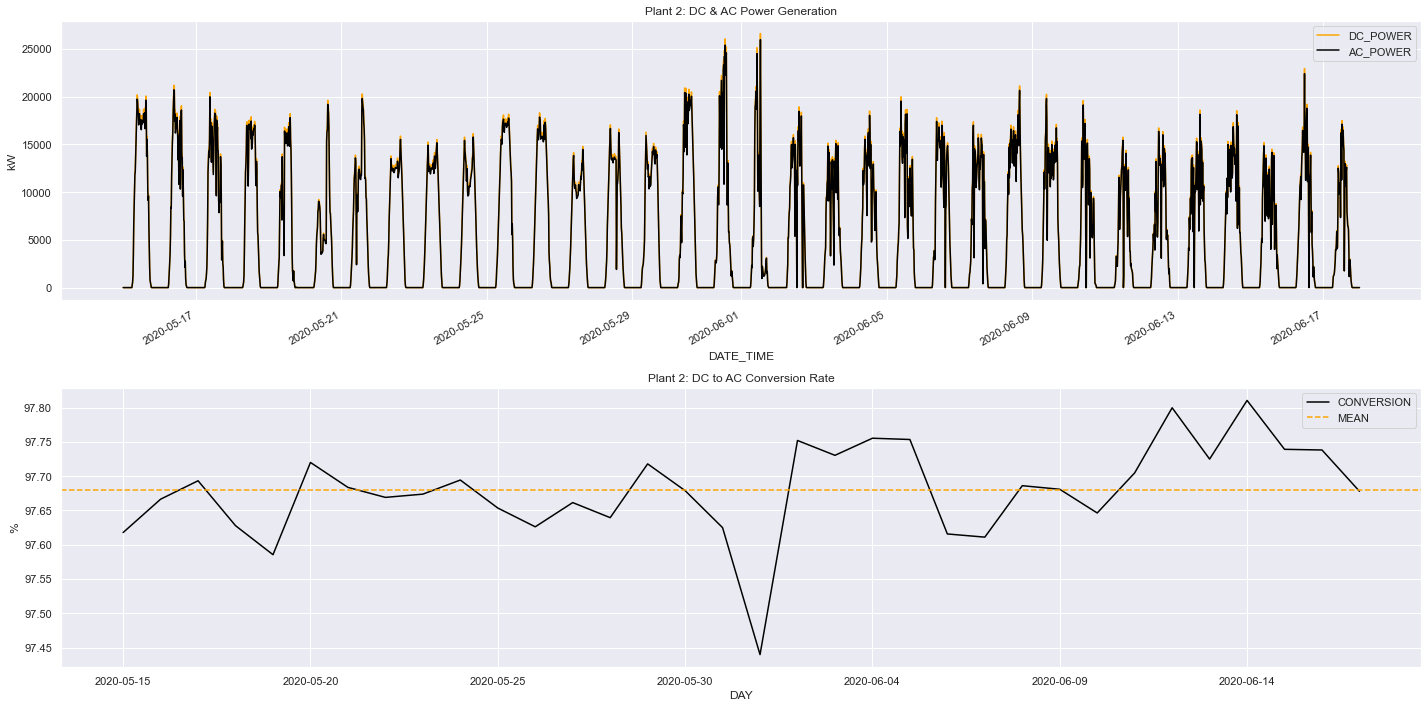

In [18]:
sns.set()

# get DC_POWER generated by all inverters every 15 minutes
# change aggfunc to sum as default is mean
gen_dc_df = df.pivot_table(values='DC_POWER', 
                           index='DATE_TIME', 
                           aggfunc=np.sum)

# get AC_POWER generated by all inverters every 15 minutes
gen_ac_df = df.pivot_table(values='AC_POWER', 
                           index='DATE_TIME', 
                           aggfunc=np.sum)

# calculate the % of DC_POWER converted to AC_POWER
df['CONVERSION'] = (df['AC_POWER']/df['DC_POWER'])*100

# get % of DC_POWER convered to AC_POWER per day
gen_conv_df = df.pivot_table(values='CONVERSION', 
                             index='DAY')

# work on our figure
fig, ax = plt.subplots(2,1, figsize=(20,10))

# fill the dress out
gen_dc_df.plot(color='orange', ax=ax[0])
gen_ac_df.plot(color='black', ax=ax[0])

ax[0].set_title('Plant 2: DC & AC Power Generation')
ax[0].set_ylabel('kW')

gen_conv_df.plot(color='black', ax=ax[1])

ax[1].set_title('Plant 2: DC to AC Conversion Rate')
ax[1].set_ylabel('%')

# set mean of % DC to AC power converson and draw horizontal line
plt.axhline(float(gen_conv_df.mean()),linestyle='--',color='orange',label='MEAN')

plt.legend()

#tighten it up
plt.tight_layout()

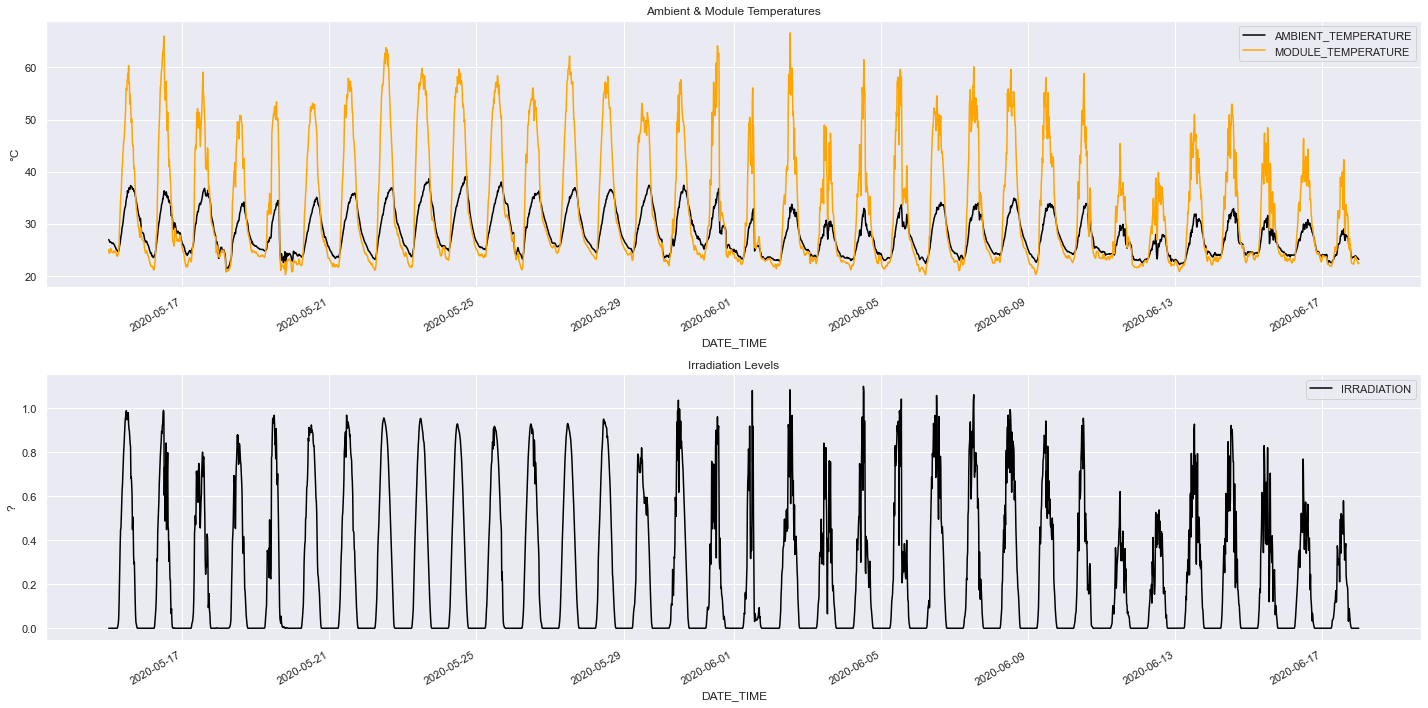

In [19]:
sns.set()

# get our AMBIENT_TEMPERATURE and MODULE_TEMPERATURE by our 15 min intervals
amb_temp_df = df.pivot_table(values='AMBIENT_TEMPERATURE', 
                             index='DATE_TIME')
mod_temp_df = df.pivot_table(values='MODULE_TEMPERATURE', 
                             index='DATE_TIME')

# get IRRADIATION by our 15 min intervals by our 15 min intervals
irr_df = df.pivot_table(values='IRRADIATION', 
                        index='DATE_TIME')

# work on our figure
fig, ax = plt.subplots(2,1, figsize=(20,10))

amb_temp_df.plot(color='black', ax=ax[0])
mod_temp_df.plot(color='orange', ax=ax[0])

ax[0].set_title('Ambient & Module Temperatures')
ax[0].set_ylabel('°C')

irr_df.plot(color='black', ax=ax[1])

ax[1].set_title('Irradiation Levels')
ax[1].set_ylabel('?')

plt.legend()

#tighten it up
plt.tight_layout()

Below, it is especially important to pivot or unstack daily DC power generation and yield. As we discovered above, some inverters are missing rows for some time slots entirely. By unstacking or pivoting, we can create rows with NULL values so long as there is data in those time slots for other days.
<br />
<br />
If we were to, for example, groupby DATE_TIME on individual days, the missing values would remain missing and would plot as unbroken lines. While the X-axis would still show the times appropriately, that is easy to miss and the visual would become misleading. By pivoting, our plotted lines break where NULL values are present.
<br />
<br />
At plant 2, we notice occasional, often significant, drops in DAILY_YIELD. As DAILY_YIELD represents "a cumulative sum of power generated on that day, until that point in time," we should not observe dips in this data.

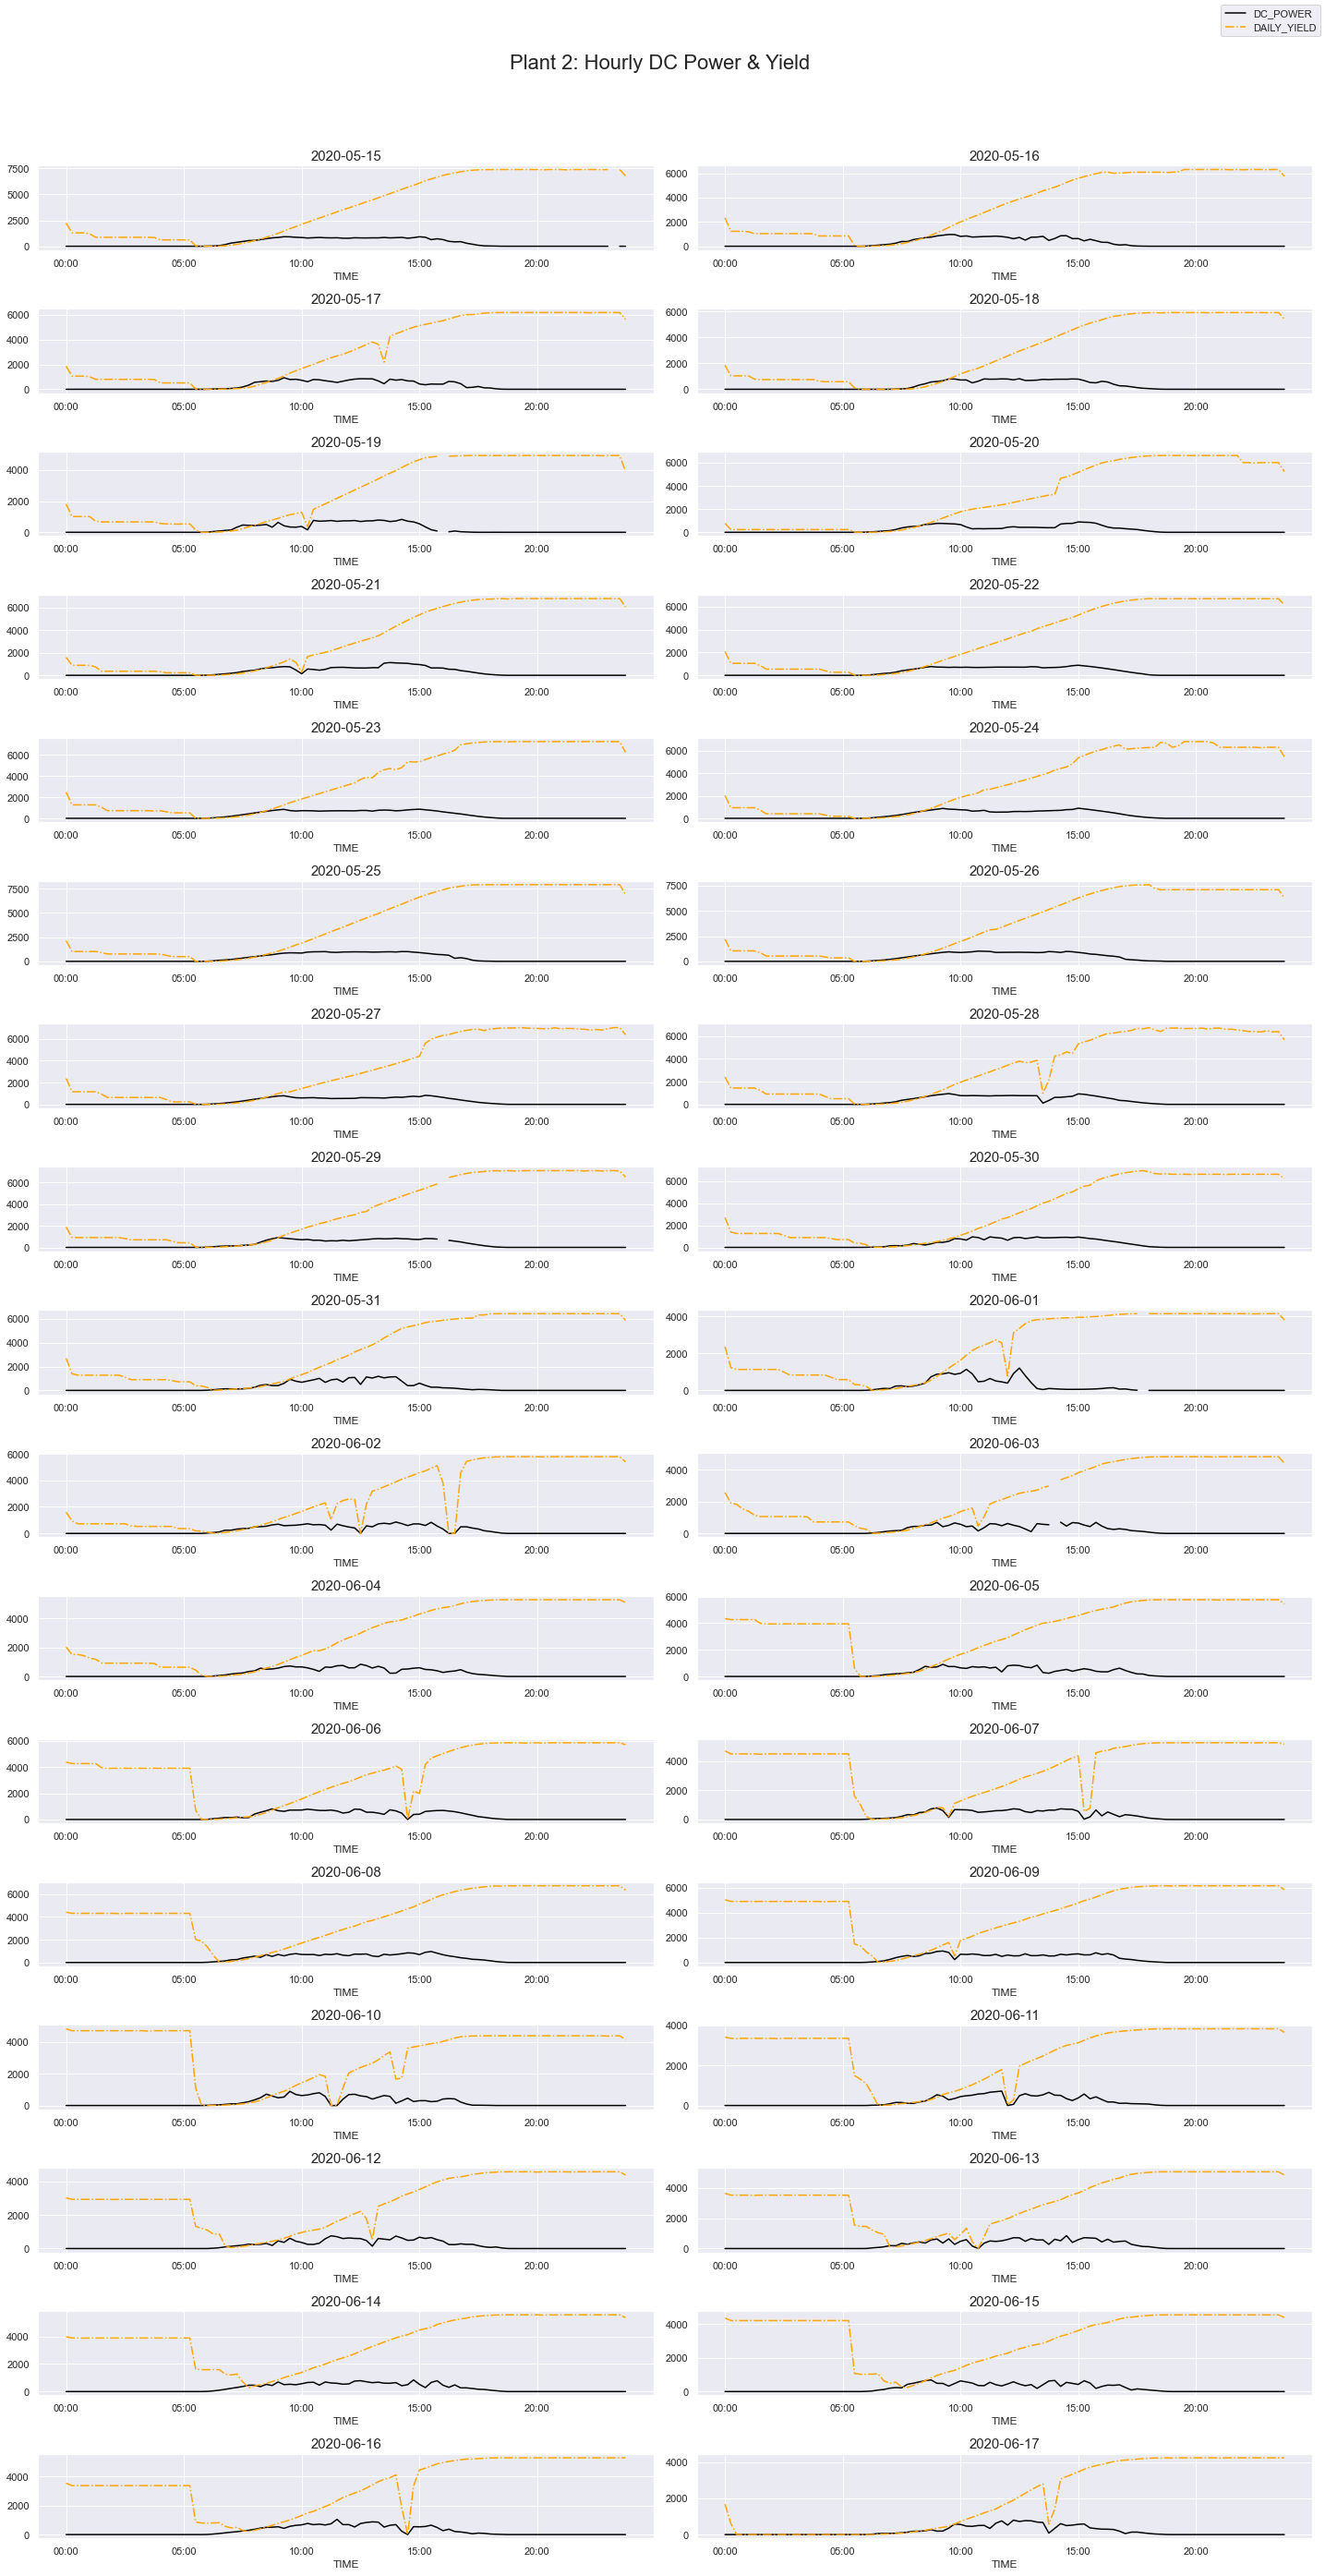

In [20]:
sns.set()

# get each day's DC_POWER by 15 minute interval
daily_dc_df = df.pivot_table(values='DC_POWER', 
                             index='TIME', 
                             columns='DAY')

# get each day's DAILY_YIELD generation by 15 minute interval
daily_yield_df = df.pivot_table(values='DAILY_YIELD', 
                                index='TIME', 
                                columns='DAY')

fig, ax = plt.subplots(17, 2, figsize=(20,40)) 

daily_dc_df.plot(subplots=True, 
                 ax=ax, 
                 color='black')

daily_yield_df.plot(subplots=True, 
                    style='-.', 
                    ax=ax, 
                    color='orange')

# add subplot titles, remove redundant legends
i = 0 
for x in ax.reshape(-1): 
  x.set_title(daily_dc_df.columns[i],size=15)
  x.get_legend().remove()
  i+=1

# add figure title and legend
fig.suptitle('Plant 2: Hourly DC Power & Yield', fontsize=22)
fig.legend(['DC_POWER','DAILY_YIELD'])

fig.tight_layout(rect=[0, 0.03, 1, .96])

plt.show()

### 5.2. Generator-Level Insights
The following plots allow us to take a look at specific generators during our chosen timeframe and compare their performance to the mean of all generators' performance in the same timeframe.

Below we'll declare some variables that we can propagate through our various visualizations.

In [21]:
# select a date range
start_date = pd.to_datetime('2020-05-19 00:00:00')
end_date = pd.to_datetime('2020-05-19 23:59:59')

date_mask = (df['DATE_TIME'] > start_date) & (df['DATE_TIME'] <= end_date)

# select a source for single-inverter views
source = 'Quc1TzYxW2pYoWX'

source_mask = (df['SOURCE_KEY_x'] == source)

#### 5.2.1. Generator Yield (Quarterly)

Our plots below reveal that our generators at Plant 2 are opperating at a significant range of capacities.

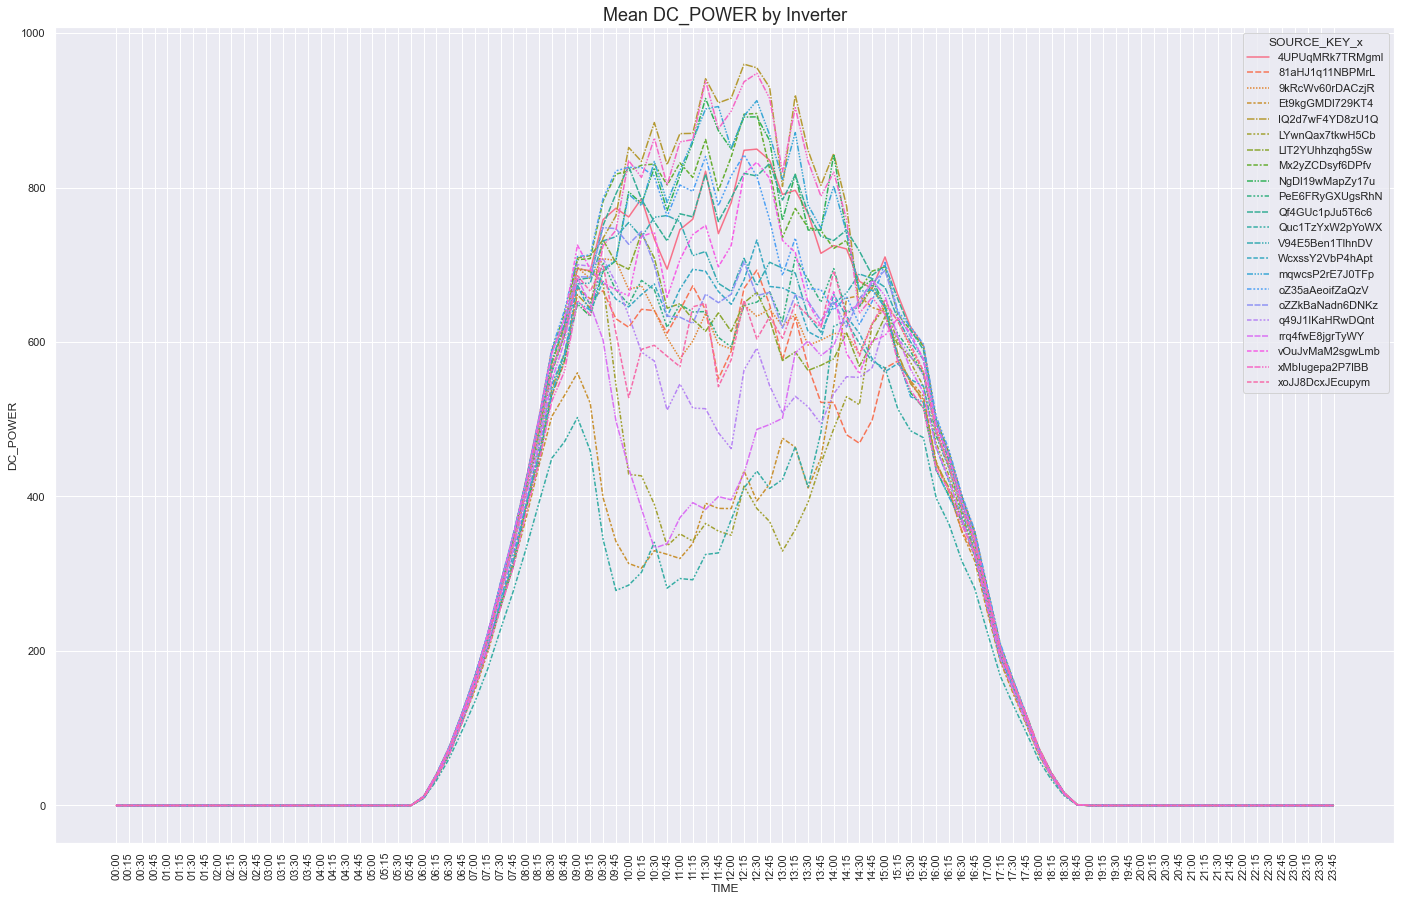

In [22]:
# get the mean DC_POWER for each 15 min interval, for all days
quarterly_mean_df = df.groupby(['SOURCE_KEY_x', 'TIME'])['DC_POWER'].mean().reset_index()

sns.set()

ax, fig = plt.subplots(figsize=(24, 15))

sns.lineplot(data=quarterly_mean_df, 
             x="TIME", 
             y="DC_POWER", 
             hue="SOURCE_KEY_x", 
             style='SOURCE_KEY_x')

plt.title('Mean DC_POWER by Inverter', fontsize=18)

plt.xticks(rotation=90)

plt.show()

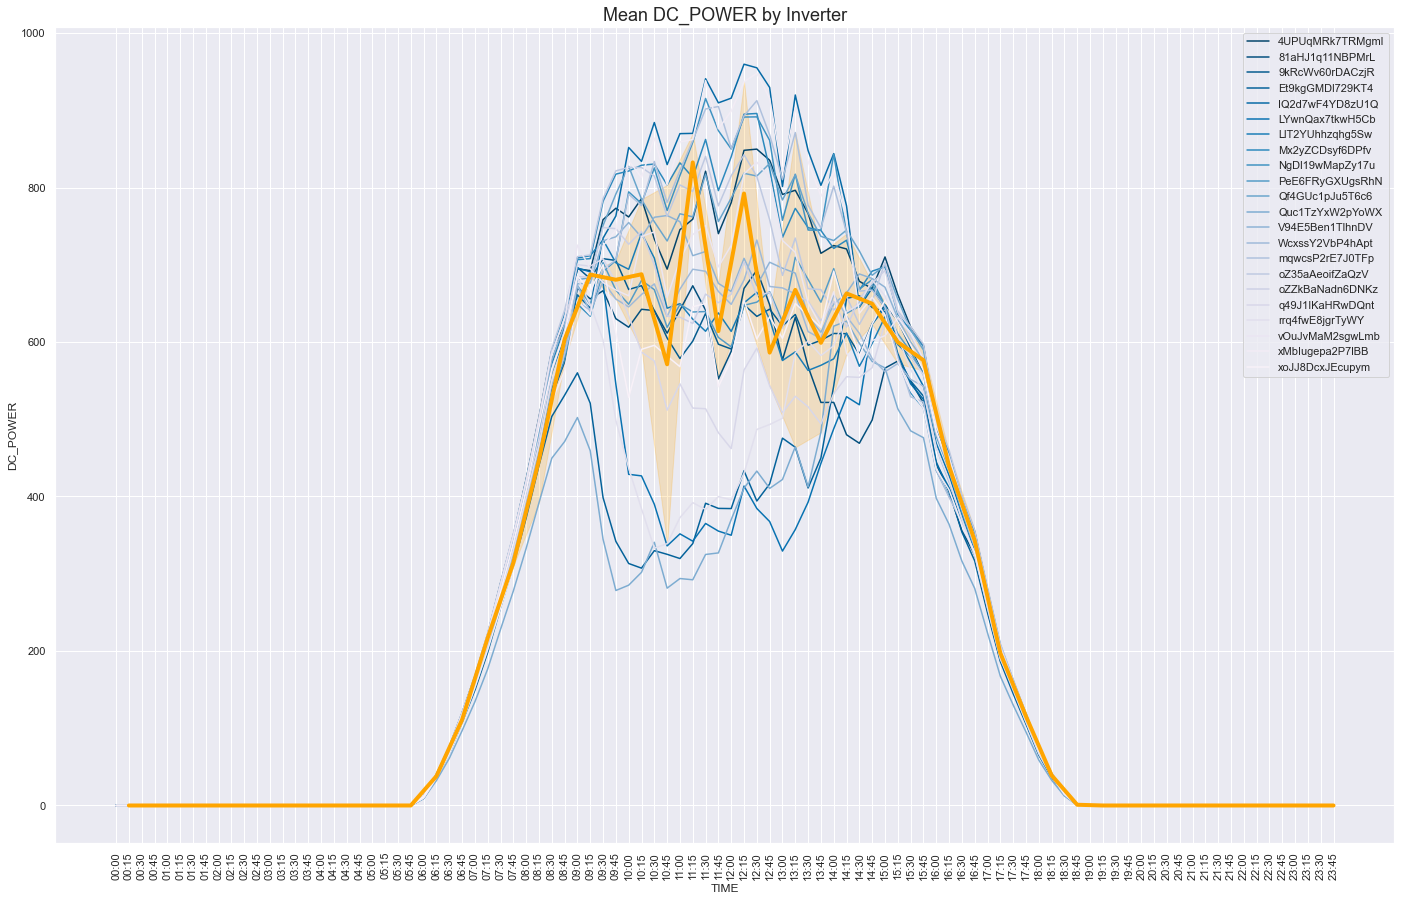

In [23]:
single_source_df = quarterly_mean_df.loc[source_mask]

ax, fig = plt.subplots(figsize=(24, 15))

sns.lineplot(data=quarterly_mean_df, 
             x="TIME", 
             y="DC_POWER", 
             hue="SOURCE_KEY_x", 
             palette='PuBu_r')

sns.lineplot(data=single_source_df, 
             x="TIME", 
             y="DC_POWER", 
             linewidth=4, 
             color='orange')

plt.title('Mean DC_POWER by Inverter', fontsize=18)

plt.xticks(rotation=90)

plt.show()

#### 5.2.2. Generator Yield (Hourly)

First, let’s prepare the DataFrames we need.

In [24]:
# DataFrames for plotting

# mean of hourly DC power of all sources during designated dates
all_hr_dcavg_df = df.loc[date_mask].groupby(['HOUR'])['DC_POWER'].mean().reset_index()

# mean of hourly AC power of all sources during designated dates
all_hr_acavg_df = df.loc[date_mask].groupby(['HOUR'])['AC_POWER'].mean().reset_index()

# mean of hourly DC power for specific source during designated dates
src_hour_dc_df = df.loc[source_mask & date_mask] \
                   .pivot_table(values='DC_POWER', 
                                index='HOUR', 
                                columns='SOURCE_KEY_x')

# mean of hourly AC power for specific source during designated dates
src_hour_ac_df = df.loc[source_mask & date_mask] \
                   .pivot_table(values='AC_POWER', 
                                index='HOUR', 
                                columns='SOURCE_KEY_x')

# mean of hourly DC_YIELD for specific source during designated dates
src_daily_yield_df = df.loc[source_mask & date_mask] \
                       .pivot_table(values='DAILY_YIELD', 
                                    index='HOUR', 
                                    columns='SOURCE_KEY_x')

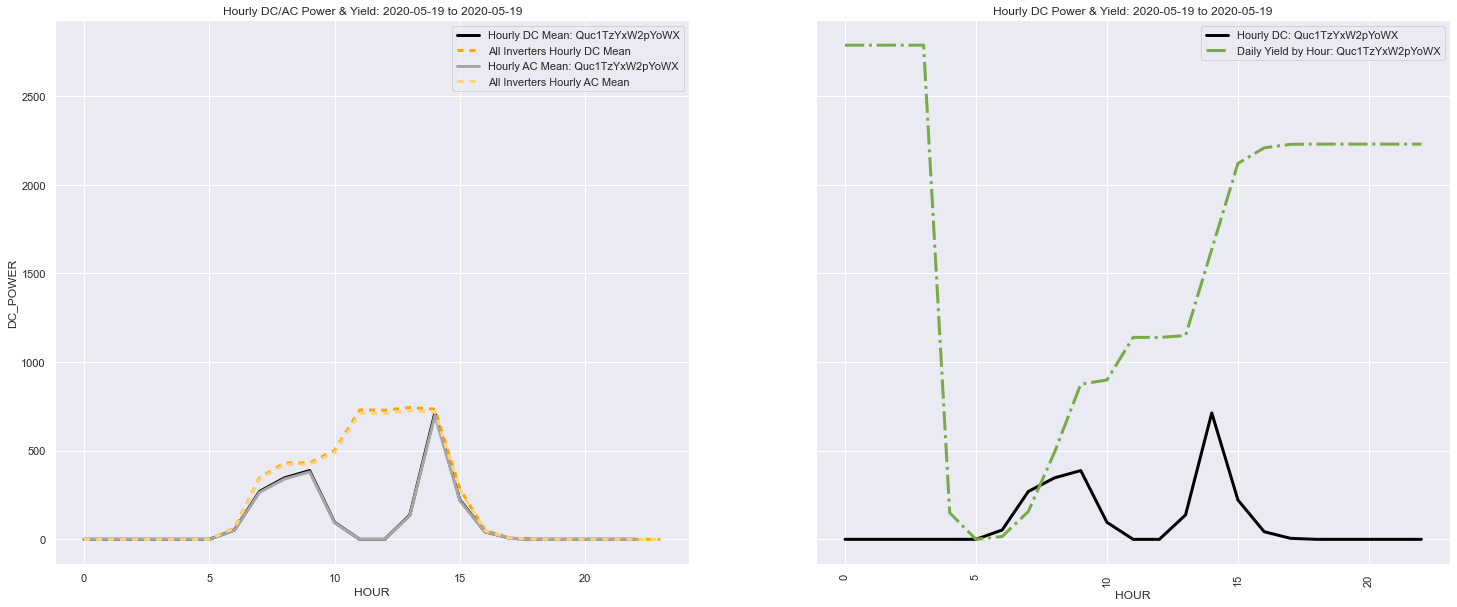

In [25]:
sns.set()

fig, ax = plt.subplots(1,2, figsize=(25,10), sharey=True)

# ax[0]
# plot hourly mean DC for specific inverter  
src_hour_dc_df.plot(linewidth=3,
                    color='black', 
                    ax=ax[0])

# plot hourly mean DC for all inverters  
sns.lineplot(data=all_hr_dcavg_df, 
             x="HOUR", 
             y="DC_POWER",
             style=True, 
             dashes=[(2,2)], 
             legend=False, 
             linewidth=3,
             color='orange', 
             ax=ax[0])

# plot hourly mean AC for specific inverter  
src_hour_ac_df.plot(linewidth=3, 
                    color='#a6a6a6', 
                    ax=ax[0])

# plot hourly mean AC for all inverters  
sns.lineplot(data=all_hr_acavg_df, 
             x="HOUR", 
             y="AC_POWER", 
             style=True, 
             dashes=[(2,2)], 
             legend=False, 
             linewidth=3,
             color='#ffd17a',
             ax=ax[0])

# ax[1]
# plot hourly mean DC for specific inverter  
src_hour_dc_df.plot(linewidth=3, 
                    color='black', 
                    ax=ax[1])

# plot hourly mean daily yield for specific inverter
src_daily_yield_df.plot(subplots=True, 
                        style='-.', 
                        linewidth=3, 
                        color='#78AB46', 
                        ax=ax[1])

title_start_date = start_date.strftime('%Y-%m-%d')
title_end_date = end_date.strftime('%Y-%m-%d')

# set titles and legends
ax[0].set_title(f'Hourly DC/AC Power & Yield: {title_start_date} to {title_end_date}')
ax[0].legend([f'Hourly DC Mean: {source}', 
              'All Inverters Hourly DC Mean', 
              f'Hourly AC Mean: {source}', 
              'All Inverters Hourly AC Mean'])

ax[1].set_title(f'Hourly DC Power & Yield: {title_start_date} to {title_end_date}')
ax[1].legend([f'Hourly DC: {source}', 
              f'Daily Yield by Hour: {source}'])

plt.xticks(rotation=90)

plt.show()

###5.3. Corrleation Analysis

In [26]:
scaler = RobustScaler()

# drop columns that are objects, dates, non-continuous values
df_to_scale = df.drop(['DATE_TIME',	
                       'PLANT_ID',	
                       'SOURCE_KEY_x', 
                       'SOURCE_KEY_y', 
                       'DAY','TIME', 
                       'MONTH', 
                       'HOUR', 
                       'CONVERSION' ], axis=1)

df_to_scale = df_to_scale[~(df['DC_POWER'] == 0)]

# fit and transform the data
df_scaled = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(df_scaled, index=df_to_scale.index, columns=df_to_scale.columns)

df_scaled.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
528,-0.720096,-0.722435,-0.618792,-0.210924,-0.690839,-0.745013,-0.688475
529,-0.721080,-0.723409,-0.618808,0.702086,-0.690839,-0.745013,-0.688475
530,-0.720138,-0.722466,-0.618541,1.479289,-0.690839,-0.745013,-0.688475
531,-0.720770,-0.723102,-0.618745,-0.211470,-0.690839,-0.745013,-0.688475
532,-0.720480,-0.722795,-0.618808,-0.197741,-0.690839,-0.745013,-0.688475


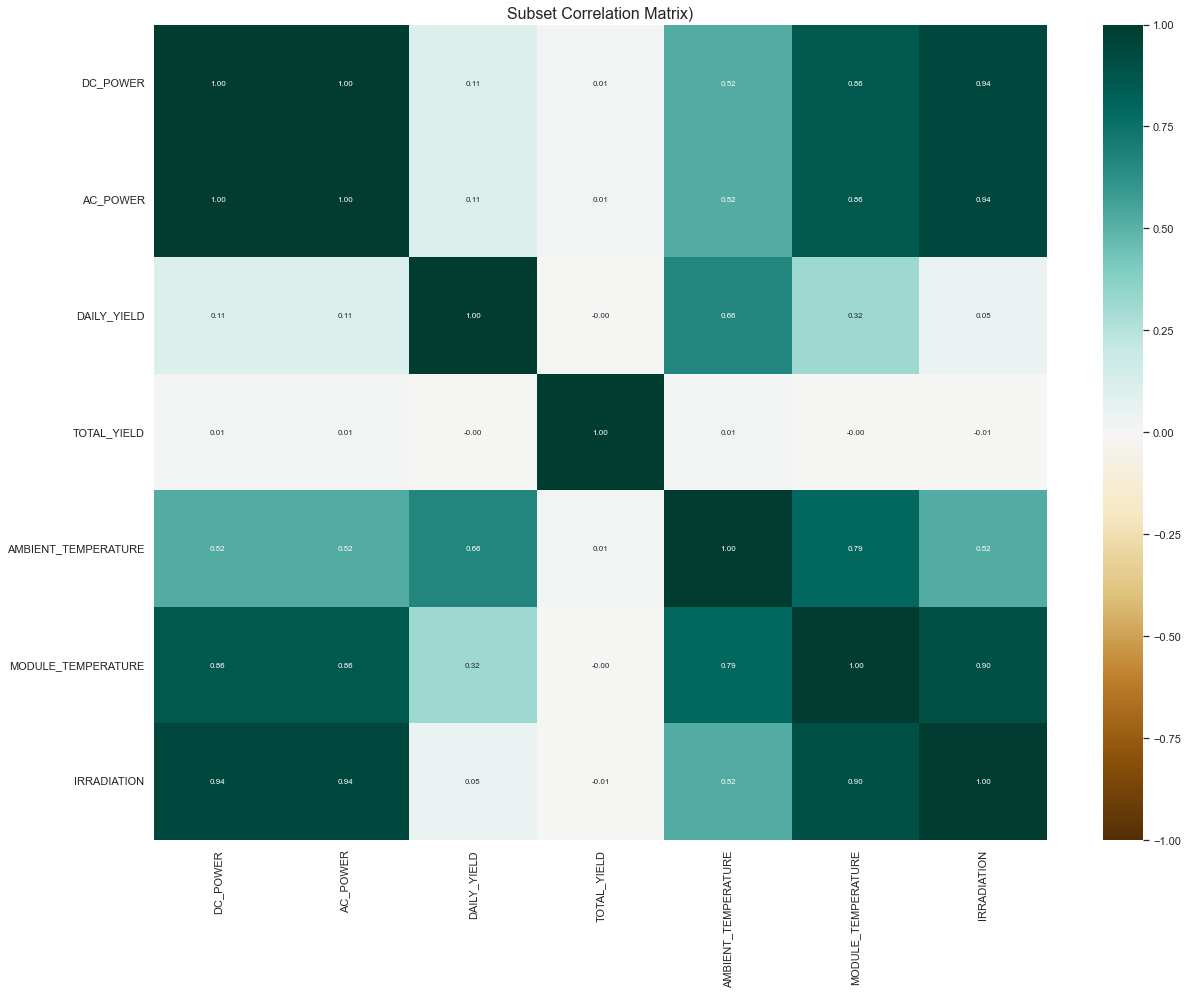

In [27]:
sns.set()

f, ax = plt.subplots(figsize=(20,15))

labels=df_scaled.columns

sns.heatmap(df_scaled.corr(), 
            annot=True, 
            fmt='.2f', 
            cmap='BrBG', 
            annot_kws={'size':8}, 
            vmin=-1, 
            vmax=1)

ax.set_title('Subset Correlation Matrix)', fontsize=16)
ax.set_yticklabels(labels, minor=False)

plt.show()